In [2]:
!python -V

Python 3.8.16


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [2]:
# seed 값 설정
np.random.seed(3)
tf.random.set_seed(3)

In [3]:
# 데이터 로드
df = pd.read_csv("../dataset/housing.csv", delim_whitespace=True, header=None)

print(df.shape)
df.head()

(506, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
dataset = df.values
print(dataset.shape)
dataset[0:5]

(506, 14)


array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00, 2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00, 2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00, 3.4700e+01],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00, 3.3400e+01],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00, 3.6200e+01]])

In [6]:
# 데이터 분리
X = dataset[:, 0:13]
y = dataset[:, 13]

# sklearn의 train_test_split 사용해서 test 데이터 생성
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3, random_state=2023)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [7]:
# 딥러닝 모델 선언
model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))  # 입력층
                                                       # 은닉층1
    
model.add(Dense(25, activation='relu'))                # 은닉층2
model.add(Dense(15, activation='relu'))                # 은닉층3
model.add(Dense(6, activation='relu'))                 # 은닉층4
model.add(Dense(1))                                    # 출력층
# 선형 회귀는 마지막에 참과 거짓을 구분할 필요가 없음. 출력층에 활성화 함수를 지정할 필요도 없음

model.compile(loss='mean_squared_error',
              optimizer='adam', 
              metrics=['mse'])

In [8]:
# 모델 저장 폴더 만들기
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"

# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_mse', 
                               verbose=1, save_best_only=True)

# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_mse', patience=100)

In [9]:
# 모델 학습
history = model.fit(X_train, y_train, 
                    validation_split=0.3, 
                    epochs=2000, 
                    batch_size=30, 
                    verbose=1, 
                    callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
1/9 [==>...........................] - ETA: 5s - loss: 1002.2432 - mse: 1002.2432
Epoch 1: val_mse improved from inf to 134.71857, saving model to ./model/01-134.7186.hdf5
9/9 [==============================] - 1s 28ms/step - loss: 288.7239 - mse: 288.7239 - val_loss: 134.7186 - val_mse: 134.7186
Epoch 2/2000
1/9 [==>...........................] - ETA: 0s - loss: 80.0808 - mse: 80.0808
Epoch 2: val_mse improved from 134.71857 to 97.83902, saving model to ./model/02-97.8390.hdf5
9/9 [==============================] - 0s 14ms/step - loss: 94.3073 - mse: 94.3073 - val_loss: 97.8390 - val_mse: 97.8390
Epoch 3/2000
5/9 [===============>..............] - ETA: 0s - loss: 109.6537 - mse: 109.6537
Epoch 3: val_mse improved from 97.83902 to 64.46247, saving model to ./model/03-64.4625.hdf5
9/9 [==============================] - 0s 29ms/step - loss: 102.4770 - mse: 102.4770 - val_loss: 64.4625 - val_mse: 64.4625
Epoch 4/2000
1/9 [==>...........................] - ETA: 0s - loss: 69.7

9/9 [==============================] - 0s 8ms/step - loss: 48.5183 - mse: 48.5183 - val_loss: 51.4808 - val_mse: 51.4808
Epoch 31/2000
1/9 [==>...........................] - ETA: 0s - loss: 27.0755 - mse: 27.0755
Epoch 31: val_mse did not improve from 51.48079
9/9 [==============================] - 0s 5ms/step - loss: 50.3378 - mse: 50.3378 - val_loss: 52.6756 - val_mse: 52.6756
Epoch 32/2000
1/9 [==>...........................] - ETA: 0s - loss: 75.0408 - mse: 75.0408
Epoch 32: val_mse improved from 51.48079 to 49.53249, saving model to ./model/32-49.5325.hdf5
9/9 [==============================] - 0s 8ms/step - loss: 48.2626 - mse: 48.2626 - val_loss: 49.5325 - val_mse: 49.5325
Epoch 33/2000
1/9 [==>...........................] - ETA: 0s - loss: 37.0513 - mse: 37.0513
Epoch 33: val_mse did not improve from 49.53249
9/9 [==============================] - 0s 6ms/step - loss: 47.6963 - mse: 47.6963 - val_loss: 50.2783 - val_mse: 50.2783
Epoch 34/2000
1/9 [==>...........................]

1/9 [==>...........................] - ETA: 0s - loss: 57.9397 - mse: 57.9397
Epoch 60: val_mse did not improve from 38.32761
9/9 [==============================] - 0s 5ms/step - loss: 34.6334 - mse: 34.6334 - val_loss: 41.5993 - val_mse: 41.5993
Epoch 61/2000
1/9 [==>...........................] - ETA: 0s - loss: 34.2211 - mse: 34.2211
Epoch 61: val_mse did not improve from 38.32761
9/9 [==============================] - 0s 4ms/step - loss: 32.8794 - mse: 32.8794 - val_loss: 39.6108 - val_mse: 39.6108
Epoch 62/2000
1/9 [==>...........................] - ETA: 0s - loss: 17.7258 - mse: 17.7258
Epoch 62: val_mse did not improve from 38.32761
9/9 [==============================] - 0s 4ms/step - loss: 32.9999 - mse: 32.9999 - val_loss: 43.2377 - val_mse: 43.2377
Epoch 63/2000
1/9 [==>...........................] - ETA: 0s - loss: 46.7358 - mse: 46.7358
Epoch 63: val_mse did not improve from 38.32761
9/9 [==============================] - 0s 4ms/step - loss: 36.5315 - mse: 36.5315 - val_los

9/9 [==============================] - 0s 5ms/step - loss: 26.8289 - mse: 26.8289 - val_loss: 34.2521 - val_mse: 34.2521
Epoch 91/2000
1/9 [==>...........................] - ETA: 0s - loss: 23.8604 - mse: 23.8604
Epoch 91: val_mse did not improve from 33.64468
9/9 [==============================] - 0s 5ms/step - loss: 25.5522 - mse: 25.5522 - val_loss: 34.2018 - val_mse: 34.2018
Epoch 92/2000
1/9 [==>...........................] - ETA: 0s - loss: 33.1357 - mse: 33.1357
Epoch 92: val_mse improved from 33.64468 to 33.00857, saving model to ./model/92-33.0086.hdf5
9/9 [==============================] - 0s 8ms/step - loss: 24.3642 - mse: 24.3642 - val_loss: 33.0086 - val_mse: 33.0086
Epoch 93/2000
1/9 [==>...........................] - ETA: 0s - loss: 38.6122 - mse: 38.6122
Epoch 93: val_mse improved from 33.00857 to 32.32452, saving model to ./model/93-32.3245.hdf5
9/9 [==============================] - 0s 8ms/step - loss: 24.1246 - mse: 24.1246 - val_loss: 32.3245 - val_mse: 32.3245
Epoc

9/9 [==============================] - 0s 5ms/step - loss: 20.2559 - mse: 20.2559 - val_loss: 32.8891 - val_mse: 32.8891
Epoch 121/2000
1/9 [==>...........................] - ETA: 0s - loss: 24.1399 - mse: 24.1399
Epoch 121: val_mse did not improve from 29.31315
9/9 [==============================] - 0s 5ms/step - loss: 21.5613 - mse: 21.5613 - val_loss: 32.4843 - val_mse: 32.4843
Epoch 122/2000
1/9 [==>...........................] - ETA: 0s - loss: 16.1183 - mse: 16.1183
Epoch 122: val_mse did not improve from 29.31315
9/9 [==============================] - 0s 5ms/step - loss: 20.9809 - mse: 20.9809 - val_loss: 30.6253 - val_mse: 30.6253
Epoch 123/2000
1/9 [==>...........................] - ETA: 0s - loss: 21.0337 - mse: 21.0337
Epoch 123: val_mse did not improve from 29.31315
9/9 [==============================] - 0s 5ms/step - loss: 20.7980 - mse: 20.7980 - val_loss: 29.8082 - val_mse: 29.8082
Epoch 124/2000
1/9 [==>...........................] - ETA: 0s - loss: 26.6372 - mse: 26.63

Epoch 151/2000
1/9 [==>...........................] - ETA: 0s - loss: 11.8152 - mse: 11.8152
Epoch 151: val_mse did not improve from 26.70508
9/9 [==============================] - 0s 5ms/step - loss: 18.1687 - mse: 18.1687 - val_loss: 36.9727 - val_mse: 36.9727
Epoch 152/2000
1/9 [==>...........................] - ETA: 0s - loss: 20.1916 - mse: 20.1916
Epoch 152: val_mse did not improve from 26.70508
9/9 [==============================] - 0s 5ms/step - loss: 19.4107 - mse: 19.4107 - val_loss: 29.2495 - val_mse: 29.2495
Epoch 153/2000
1/9 [==>...........................] - ETA: 0s - loss: 24.5690 - mse: 24.5690
Epoch 153: val_mse did not improve from 26.70508
9/9 [==============================] - 0s 4ms/step - loss: 17.7260 - mse: 17.7260 - val_loss: 33.4938 - val_mse: 33.4938
Epoch 154/2000
1/9 [==>...........................] - ETA: 0s - loss: 19.1910 - mse: 19.1910
Epoch 154: val_mse did not improve from 26.70508
9/9 [==============================] - 0s 4ms/step - loss: 26.9696 - 

Epoch 182/2000
1/9 [==>...........................] - ETA: 0s - loss: 13.9721 - mse: 13.9721
Epoch 182: val_mse did not improve from 25.03893
9/9 [==============================] - 0s 5ms/step - loss: 15.4042 - mse: 15.4042 - val_loss: 27.6036 - val_mse: 27.6036
Epoch 183/2000
1/9 [==>...........................] - ETA: 0s - loss: 19.9283 - mse: 19.9283
Epoch 183: val_mse did not improve from 25.03893
9/9 [==============================] - 0s 4ms/step - loss: 17.5965 - mse: 17.5965 - val_loss: 29.9571 - val_mse: 29.9571
Epoch 184/2000
1/9 [==>...........................] - ETA: 0s - loss: 11.6976 - mse: 11.6976
Epoch 184: val_mse did not improve from 25.03893
9/9 [==============================] - 0s 4ms/step - loss: 15.3851 - mse: 15.3851 - val_loss: 26.5560 - val_mse: 26.5560
Epoch 185/2000
1/9 [==>...........................] - ETA: 0s - loss: 11.1354 - mse: 11.1354
Epoch 185: val_mse did not improve from 25.03893
9/9 [==============================] - 0s 4ms/step - loss: 14.7660 - 

1/9 [==>...........................] - ETA: 0s - loss: 11.7168 - mse: 11.7168
Epoch 213: val_mse did not improve from 24.91884
9/9 [==============================] - 0s 5ms/step - loss: 14.1818 - mse: 14.1818 - val_loss: 26.8957 - val_mse: 26.8957
Epoch 214/2000
1/9 [==>...........................] - ETA: 0s - loss: 13.0296 - mse: 13.0296
Epoch 214: val_mse did not improve from 24.91884
9/9 [==============================] - 0s 4ms/step - loss: 13.3697 - mse: 13.3697 - val_loss: 28.7749 - val_mse: 28.7749
Epoch 215/2000
1/9 [==>...........................] - ETA: 0s - loss: 17.0570 - mse: 17.0570
Epoch 215: val_mse did not improve from 24.91884
9/9 [==============================] - 0s 4ms/step - loss: 13.7659 - mse: 13.7659 - val_loss: 27.8236 - val_mse: 27.8236
Epoch 216/2000
1/9 [==>...........................] - ETA: 0s - loss: 10.8679 - mse: 10.8679
Epoch 216: val_mse did not improve from 24.91884
9/9 [==============================] - 0s 4ms/step - loss: 12.7104 - mse: 12.7104 - 

1/9 [==>...........................] - ETA: 0s - loss: 11.3011 - mse: 11.3011
Epoch 244: val_mse did not improve from 24.91884
9/9 [==============================] - 0s 4ms/step - loss: 12.8959 - mse: 12.8959 - val_loss: 27.1062 - val_mse: 27.1062
Epoch 245/2000
1/9 [==>...........................] - ETA: 0s - loss: 8.5547 - mse: 8.5547
Epoch 245: val_mse did not improve from 24.91884
9/9 [==============================] - 0s 5ms/step - loss: 13.4211 - mse: 13.4211 - val_loss: 29.8013 - val_mse: 29.8013
Epoch 246/2000
1/9 [==>...........................] - ETA: 0s - loss: 11.4295 - mse: 11.4295
Epoch 246: val_mse did not improve from 24.91884
9/9 [==============================] - 0s 4ms/step - loss: 11.5931 - mse: 11.5931 - val_loss: 32.7375 - val_mse: 32.7375
Epoch 247/2000
1/9 [==>...........................] - ETA: 0s - loss: 8.7935 - mse: 8.7935
Epoch 247: val_mse did not improve from 24.91884
9/9 [==============================] - 0s 4ms/step - loss: 13.2389 - mse: 13.2389 - val_

1/9 [==>...........................] - ETA: 0s - loss: 13.6016 - mse: 13.6016
Epoch 275: val_mse did not improve from 24.91884
9/9 [==============================] - 0s 4ms/step - loss: 10.4821 - mse: 10.4821 - val_loss: 26.3620 - val_mse: 26.3620
Epoch 276/2000
1/9 [==>...........................] - ETA: 0s - loss: 6.4475 - mse: 6.4475
Epoch 276: val_mse did not improve from 24.91884
9/9 [==============================] - 0s 5ms/step - loss: 11.4765 - mse: 11.4765 - val_loss: 28.8438 - val_mse: 28.8438
Epoch 277/2000
1/9 [==>...........................] - ETA: 0s - loss: 7.2092 - mse: 7.2092
Epoch 277: val_mse did not improve from 24.91884
9/9 [==============================] - 0s 4ms/step - loss: 11.2877 - mse: 11.2877 - val_loss: 29.6936 - val_mse: 29.6936
Epoch 278/2000
1/9 [==>...........................] - ETA: 0s - loss: 9.9918 - mse: 9.9918
Epoch 278: val_mse did not improve from 24.91884
9/9 [==============================] - 0s 4ms/step - loss: 11.9214 - mse: 11.9214 - val_lo

In [12]:
# 예측 값과 실제 값의 비교
y_prediction = model.predict(X_test).flatten()
# flatten : 데이터 배열이 몇 차원이든 모두 1차원으로 바꿔 읽기 쉽게 해 주는 함수

# 10개 실제값과 예측값 비교
for i in range(10):
    label = y_test[i]
    prediction = y_prediction[i]
    print(label, "    ", prediction)

5/5 [==============================] - 0s 1ms/step
14.2      16.38325
15.6      17.874159
23.7      26.424591
20.4      21.68967
23.1      23.597746
50.0      51.399967
23.2      15.900731
36.0      31.577705
17.1      20.147186
14.1      16.911844


In [ ]:
# 어느정도 실제값을 잘 예측하는 것을 알 수 있다.

# 시각화

In [13]:
# y_acc 에 학습 셋으로 측정한 정확도의 값을 저장
y_vmse = history.history['val_mse']
y_mse = history.history['mse']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_mse))
print('epoch 수:', len(x_len))

epoch 수: 286


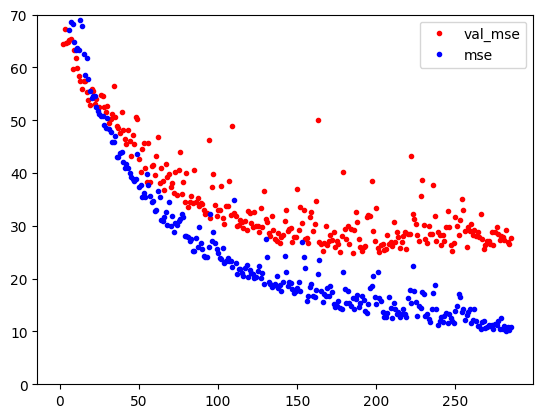

In [14]:
plt.plot(x_len, y_vmse, "o", c="red", markersize=3, label='val_mse')
plt.plot(x_len, y_mse, "o", c="blue", markersize=3, label='mse')

plt.legend()
plt.ylim(0, 70)

plt.show()